<a href="https://colab.research.google.com/github/diaruizja/DS_precios_propiedades/blob/master/Predicci%C3%B3n_precios_de_propiedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = '/content/drive/My Drive/Data Science/Entregas de proyectos/Entrega #3/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [ ]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [ ]:
x = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, "\n", y_train.shape, "\n", x_test.shape, "\n", y_test.shape)

(5100, 58) 
 (5100,) 
 (1276, 58) 
 (1276,)


In [ ]:
x_train.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BELGRANO,BOCA,BOEDO,CABALLITO,CHACARITA,COGHLAN,COLEGIALES,CONSTITUCION,FLORES,FLORESTA,LINIERS,MATADEROS,MONSERRAT,MONTE CASTRO,NUEVA POMPEYA,NUEZ,PALERMO,PARQUE AVELLANEDA,PARQUE CHACABUCO,PARQUE CHAS,PARQUE PATRICIOS,PATERNAL,PUERTO MADERO,RECOLETA,RETIRO,SAAVEDRA,SAN CRISTOBAL,SAN NICOLAS,SAN TELMO,VELEZ SARSFIELD,VERSALLES,VILLA CRESPO,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
5162,-34.614,-58.476,45.000,39.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
320,-34.575,-58.419,27.000,27.000,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4297,-34.608,-58.441,69.000,60.000,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,-34.600,-58.486,44.000,44.000,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6308,-34.602,-58.491,46.000,39.000,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

5162   117000.000
320     90000.000
4297   145000.000
6344    80000.000
6308    83000.000
Name: price_aprox_usd, dtype: float64

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [ ]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [ ]:
# Acá realizá la predicción
y_pred=tree_reg.predict(x_test)
y_pred

array([106000.,  94900.,  85000., ...,  70000., 157000., 165000.])

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [ ]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np
tree_mse = mean_squared_error(y_test, y_pred)
print("El RMSE Test es : ", np.sqrt(tree_mse))

El RMSE Test es :  26054.129194768066


In [ ]:
#Calculo del RMSE para los datos de entrenamiento

tree_reg_predict=tree_reg.predict(x_train)
tree_reg_predict

array([117000.,  90000., 145000., ..., 165000., 155000.,  82000.])

In [ ]:
tree_mse_train = mean_squared_error(y_train, tree_reg_predict)
print("El RMSE Train es : ", np.sqrt(tree_mse_train))

El RMSE Train es :  524.6159495069933


In [ ]:
tree_reg.tree_.max_depth

34

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [ ]:
rmses_train=[]
rmses_test=[]
max_deep=list(range(1,30, 5))
for i in max_deep:
    tree_reg2 = DecisionTreeRegressor(max_depth=i)
    tree_reg2.fit(x_train, y_train)
    
    y_pred1=tree_reg2.predict(x_train)
    tree_mse1 = mean_squared_error(y_train, y_pred1)
    tree_train=np.sqrt(tree_mse1)

    y_pred2=tree_reg2.predict(x_test)
    tree_mse2 = mean_squared_error(y_test, y_pred2)
    tree_test=np.sqrt(tree_mse2)


    rmses_train.append(tree_train)
    rmses_test.append(tree_test)

print(rmses_test, "\n", rmses_train)

[26937.54924546688, 22538.73129484442, 23512.949429604585, 25541.75406764083, 26419.019439637752, 26138.05469162274] 
 [26658.471745949068, 19960.423851366526, 14484.238639324467, 7305.321030516515, 3326.7301927680323, 1016.6779646121108]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

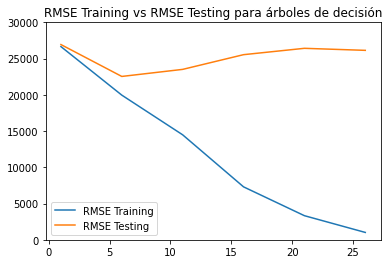

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [ ]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train) 


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_y_pred=knn.predict(x_test)
knn_y_pred

array([125600. , 116600. ,  85899.8, ..., 135600. , 153400. , 158800. ])

In [ ]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
print("El RMSE Test es : ", np.sqrt(knn_mse))

El RMSE Test es :  23850.554618530583


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [ ]:
# Calculá los cambio en el rmse en esta celda
rmses_train=[]
rmses_test=[]
vecinos=list(range(1,30, 1))
for i in vecinos:
    knn2 = KNeighborsRegressor(n_neighbors=i)
    knn2.fit(x_train, y_train)
    
    knn_y_pred1=knn2.predict(x_train)
    knn_mse1 = mean_squared_error(y_train, knn_y_pred1)
    knn_train=np.sqrt(knn_mse1)

    knn_y_pred2=knn2.predict(x_test)
    knn_mse2 = mean_squared_error(y_test, knn_y_pred2)
    knn_test=np.sqrt(knn_mse2)


    rmses_train.append(knn_train)
    rmses_test.append(knn_test)

print(rmses_test, "\n", rmses_train)

[28308.403141580446, 25456.822063228276, 24290.453696614713, 23929.25720218075, 23850.554618530583, 23708.279508942698, 23539.5347708353, 23432.267511477243, 23496.600774339633, 23454.472660986718, 23318.62739553956, 23301.299850425323, 23322.058009586268, 23357.39568158508, 23338.119943284997, 23346.189897538105, 23332.255549761012, 23370.441674487312, 23344.311524517776, 23380.19165848986, 23415.07827250983, 23461.50017059232, 23522.82272462045, 23540.82854042481, 23551.032947212996, 23603.948522728486, 23585.15712132058, 23597.101651821344, 23641.066658202464] 
 [701.4825556507824, 13520.349226626475, 16322.564493653386, 17560.16083794874, 18449.11274302728, 19079.36181093193, 19584.09065155996, 19915.35549888701, 20181.998189595255, 20431.293120248498, 20624.992455309333, 20792.635154665877, 20974.74376337063, 21119.162446610848, 21264.544493194968, 21402.974952034052, 21511.467849399272, 21605.533707338815, 21704.417189061543, 21815.206248963565, 21902.63941973426, 21982.488233357

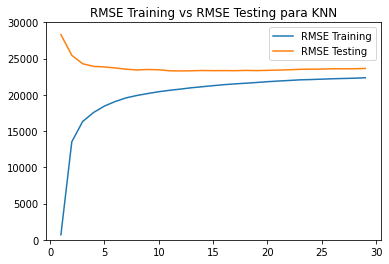

In [ ]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [ ]:
def nmsq2rmse(score):
  return np.sqrt(-score)


In [ ]:
regressor= DecisionTreeRegressor(max_depth=5)
regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Calculá en esta celda los cross_val_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())

Scores:  [21547.73848313 21900.35225427 21338.88369034 21806.05306003
 22311.57723422 21091.66490951 21003.46098272 22775.31691547
 22199.93592786 23590.26562572]
Promedio:  21956.5249083264


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [ ]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [ ]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [ ]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,88000.000,131431.103,43431.103
1,85000.000,131431.103,46431.103
2,112500.000,81117.839,31382.161
3,175000.000,137663.581,37336.419
4,169000.000,151157.943,17842.057
5,119000.000,115436.546,3563.454
6,135000.000,114282.532,20717.468
7,115000.000,131431.103,16431.103
8,79000.000,75862.308,3137.692
9,77500.000,99461.330,21961.330
